***Name : Sawant Shreyas Hanmant***

***Roll No.: 2447046***

***Batch : C***

**Problem Statement ->**

Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np

C:\Users\SHREYAS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [14]:
uber = pd.read_csv("uber.csv")

In [15]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [16]:
uber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
#missing values

In [17]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [18]:
uber = uber.drop(['Unnamed: 0', 'key'], axis=1)

In [19]:
uber = uber.dropna()

In [20]:
uber = uber[(uber['fare_amount'] > 0) & (uber['passenger_count'] > 0)]

In [111]:
uber.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
price                0
dtype: int64

In [23]:
#outliers

In [24]:
Q1 = uber['fare_amount'].quantile(0.25)
Q3 = uber['fare_amount'].quantile(0.75)

In [25]:
IQR = Q3 - Q1

In [26]:
uber = uber[~((uber['fare_amount'] < (Q1 - 1.5 * IQR)) | (uber['fare_amount'] > (Q3 + 1.5 * IQR)))]

In [27]:
#Extract Time and date

In [28]:
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_6840\978245494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])


In [29]:
uber['hour'] = uber['pickup_datetime'].dt.hour

C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_6840\1247932192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber['hour'] = uber['pickup_datetime'].dt.hour


In [30]:
uber = uber.drop(['pickup_datetime'], axis=1)

In [87]:
uber["price"] = uber['hour']*uber['fare_amount']

In [88]:
uber.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,142.5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,154.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,270.9
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,42.4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,272.0


In [32]:
#correlation

In [33]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

In [89]:
corr_matrix = uber.corr()

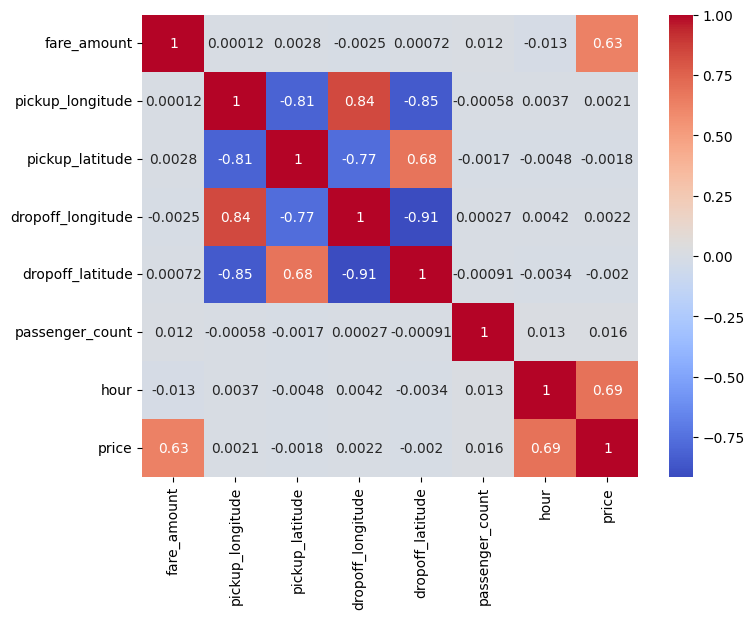

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [91]:
x = uber.drop(['fare_amount'], axis=1)
y = uber['fare_amount']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [95]:
lr_model = LinearRegression()

In [96]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred_lr = lr_model.predict(X_test)

In [98]:
ridge_model = Ridge()

In [99]:
ridge_model.fit(X_train, y_train)

Ridge()

In [100]:
y_pred_ridge = ridge_model.predict(X_test)

In [101]:
lasso_model = Lasso()

In [102]:
lasso_model.fit(X_train, y_train)

Lasso()

In [103]:
y_pred_lasso = lasso_model.predict(X_test)

In [104]:
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} - R2: {r2:.4f}, RMSE: {rmse:.2f}')

In [106]:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

Linear Regression - R2: 0.7917, RMSE: 1.88
Ridge Regression - R2: 0.7917, RMSE: 1.88
Lasso Regression - R2: 0.7887, RMSE: 1.90
